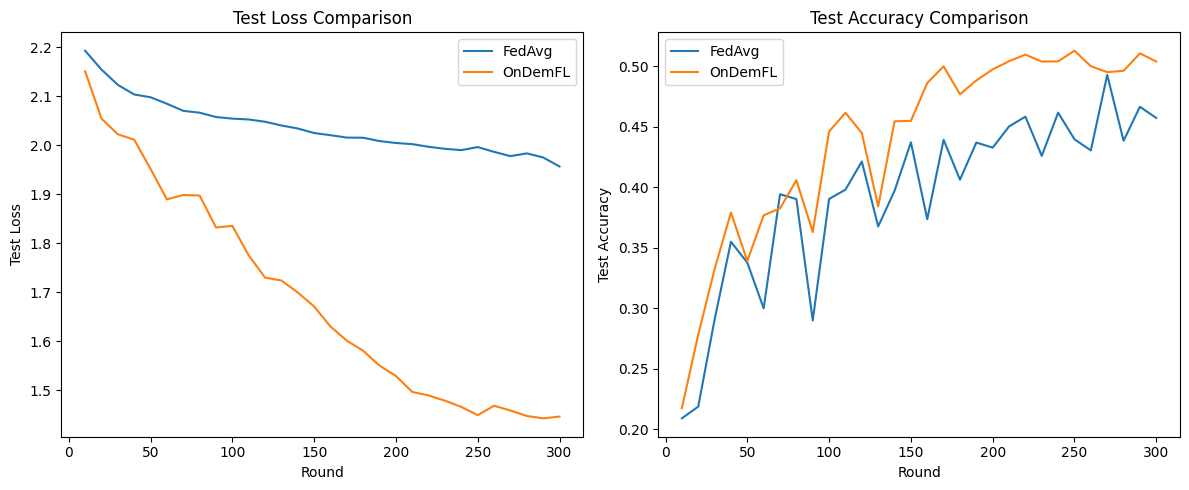

In [4]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file, freq=1):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    if round_num % freq != 0:
                        continue  # 跳过不需要的轮次
                    results = record.get('Results_raw', {})
                    if 'test_avg_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_avg_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

fedavg_log = 'exp/FedAvg_convnet2_on_CIFAR10@torchvision_lr0.01_lstep1/sub_exp_20251031112556/eval_results.log'
ondemfl_log = 'exp/ondemfl_ondemfl_on_CIFAR10@torchvision_lr0.01_lstep1/sub_exp_20251031181658/eval_results.log'


# 设置画图频率
freq = 10

# 加载日志数据时传入freq参数
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log, freq)
rounds_ondemfl, losses_ondemfl, accs_ondemfl = load_data(ondemfl_log, freq)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比

axs[0].plot(rounds_avg, losses_avg, label='FedAvg')
axs[0].plot(rounds_ondemfl, losses_ondemfl, label='OnDemFL')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_avg, accs_avg, label='FedAvg')
axs[1].plot(rounds_ondemfl, accs_ondemfl, label='OnDemFL')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()